In [1]:
import networkx as nx
import random
import tarfile

In [ ]:
with tarfile.open("facebook.tar.gz", "r:gz") as tar:
    tar.extractall(path="facebook_data/")
    file_list = tar.getnames()


# Method 1: Randomly selecting 100 nodes from graph 

In [ ]:
facebook_file = "facebook_data/" + file_list[0]  

#parse data and form connections
G = nx.Graph()
with open(facebook_file, 'r') as f:
    for line in f:
        user1, user2 = map(int, line.strip().split())
        G.add_edge(user1, user2)

In [ ]:
new_G = nx.Graph()
selected_nodes = random.sample(list(G.nodes()), 100)

# add edges if exist in original graph
for i in range(100):
    for j in range(i+1, 100):
        if G.has_edge(selected_nodes[i], selected_nodes[j]):
            new_G.add_edge(selected_nodes[i], selected_nodes[j])

print(f"New Graph has {new_G.number_of_nodes()} nodes and {new_G.number_of_edges()} edges.")
nx.write_edgelist(new_G, "new_facebook_network.txt")

# Method 2: Random walk sampling

Start at a random and node and perform a "random walk." At each step, with a given probability, continue the walk to a neighboring node or stop the walk. If the walk stops, start another random walk at a node that hasn't been visited.

In [ ]:
def random_walk_sampling(G, num_nodes):
    sampled_graph = nx.Graph()
    all_nodes = list(G.nodes())
    
    visited = set()

    while len(visited) < num_nodes:
        if not all_nodes:
            break
        
        start_node = random.choice(all_nodes)
        if start_node in visited:
            all_nodes.remove(start_node)
            continue
        
        current_path = [start_node]
        
        while True:
            neighbors = list(G.neighbors(current_path[-1]))
            neighbors = [n for n in neighbors if n not in visited and n not in current_path]

            if not neighbors:
                break

            next_node = random.choice(neighbors)
            current_path.append(next_node)

            if len(visited) + len(current_path) > num_nodes:
                break

        visited.update(current_path[:num_nodes-len(visited)])
        for i in range(1, len(current_path)):
            sampled_graph.add_edge(current_path[i-1], current_path[i])

    return sampled_graph

# Method 3: Select 100 nodes that have the highest degree

From the original SNAP Facebook Circle, select the top 100 nodes in terms of degree. In the final graph, include edges between the 100 nodes that were present in the original graph

In [84]:
#There are 10 social circles in the Facebook dataset. #.edges file contains the edges of each social circle.
#using this, calculate the degree of each node in each social circle 

import networkx as nx
import random
import matplotlib.pyplot as plt

#don't know if it matter which circle we choose
circles = [0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980]
i = 4
path = "facebook_data/facebook/" + str(circles[i]) + ".edges"


G = nx.Graph()
with open(path, 'r') as f:
    for line in f:
        user1, user2 = map(int, line.strip().split())
        G.add_edge(user1, user2)

print("Number of people in Facebook circle", str(circles[i])+":", len(G.nodes()))

#calculate degree of each node
degree_dict = {}
for node in G.nodes():
    degree_dict[node] = G.degree(node)

#sort the dictionary by degree
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

#find the top 100 nodes with highest degree
top_100_nodes = sorted_degree[:100]

new_G = nx.Graph()
for node in top_100_nodes:
    new_G.add_node(node[0])

nodes_list = [node[0] for node in top_100_nodes]


for i in range(100):
    for j in range(i+1, 100):
        if G.has_edge(nodes_list[i], nodes_list[j]):
            new_G.add_edge(nodes_list[i], nodes_list[j])


Number of people in Facebook circle 686: 168


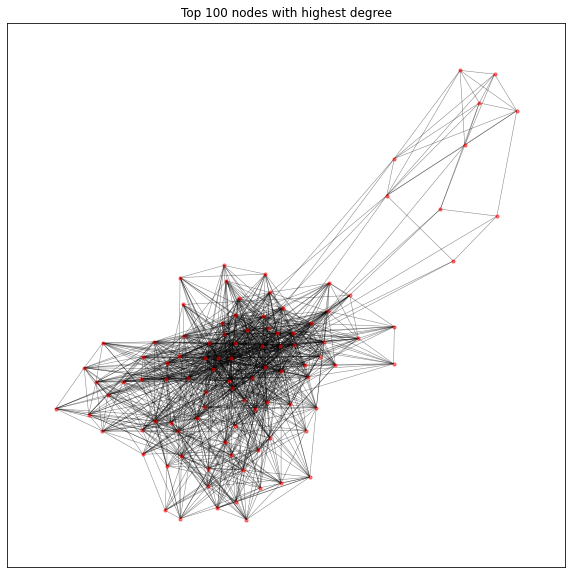

In [85]:
plt.figure(figsize=(10,10))
nx.draw_networkx(new_G, with_labels=False, node_size=10, node_color='r', alpha=0.5, width=0.5)
plt.title("Top 100 nodes with highest degree")
plt.show()